In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


Text(0.5, 1.0, 'Ground Truth : 3')

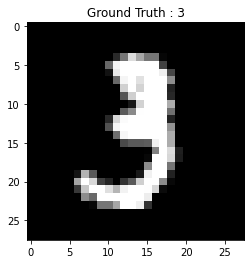

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
print(train_images.shape)
print(train_labels.shape)
plt.imshow(train_images[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[10]))
# plt.show()

In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
# scale data
train_data /=255.0
test_data /=255.0

In [5]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 7s 27ms/step - loss: 0.5000 - accuracy: 0.8439 - val_loss: 0.1717 - val_accuracy: 0.9455
Epoch 2/20
235/235 [==============================] - 6s 25ms/step - loss: 0.1000 - accuracy: 0.9685 - val_loss: 0.1086 - val_accuracy: 0.9671
Epoch 3/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.0882 - val_accuracy: 0.9716
Epoch 4/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0652 - val_accuracy: 0.9808
Epoch 5/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0777 - val_accuracy: 0.9776
Epoch 6/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0891 - val_accuracy: 0.9785
Epoch 7/20
235/235 [==============================] - 6s 25ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.1036 - val_accuracy: 0.9761

In [8]:
# Plotting Loss and Accuracy Curve
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


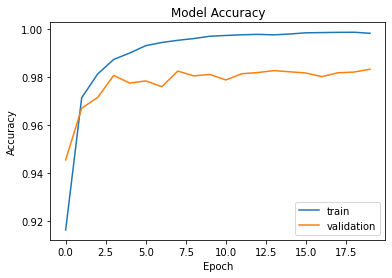

In [9]:
# Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

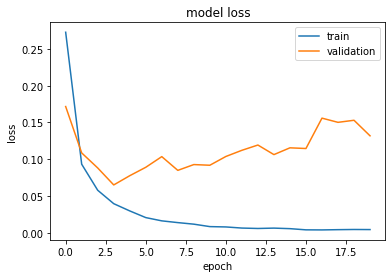

In [10]:
# Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

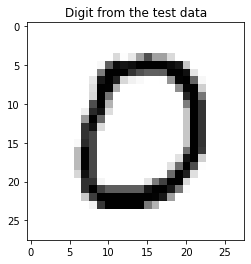

Predicted digit: 0


In [11]:
# Plotting digit from Test Data and predicting it
plt.imshow(test_data[10].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()
pred = model.predict(test_data[10].reshape(1,784))
print("Predicted digit:",pred.argmax())

In [12]:
# Adding more hidden layers 
model1 = Sequential()
model1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model1.add(Dense(512, activation='tanh'))
model1.add(Dense(512, activation='tanh'))
model1.add(Dense(512, activation='tanh'))
model1.add(Dense(10, activation='sigmoid'))

In [13]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss1, test_acc1] = model1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

Epoch 1/20
235/235 [==============================] - 12s 46ms/step - loss: 0.7274 - accuracy: 0.7827 - val_loss: 0.2661 - val_accuracy: 0.9132
Epoch 2/20
235/235 [==============================] - 11s 46ms/step - loss: 0.1869 - accuracy: 0.9425 - val_loss: 0.2606 - val_accuracy: 0.9176
Epoch 3/20
235/235 [==============================] - 11s 46ms/step - loss: 0.1131 - accuracy: 0.9647 - val_loss: 0.1408 - val_accuracy: 0.9522
Epoch 4/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0803 - accuracy: 0.9746 - val_loss: 0.1044 - val_accuracy: 0.9682
Epoch 5/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0553 - accuracy: 0.9823 - val_loss: 0.0967 - val_accuracy: 0.9702
Epoch 6/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.1848 - val_accuracy: 0.9409
Epoch 7/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.1014 - val_accuracy: